In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Configuration
# This must match the filename generated by your fix_dataset.py
csv_file_path = "corrected_crop_dataset.csv" 

# Set visual style for graphs
sns.set_style("whitegrid")

print("✅ Libraries loaded successfully.")

✅ Libraries loaded successfully.


In [2]:
# Cell 2: Load the Dataset
print("⏳ Loading dataset...")

try:
    df = pd.read_csv(csv_file_path)
    print(f"✅ Data loaded successfully! Shape: {df.shape}")
    
    # Show the first 5 rows nicely
    print("\n--- First 5 Rows of the Dataset ---")
    display(df.head())

except FileNotFoundError:
    print("❌ Error: 'corrected_crop_dataset.csv' not found.")
    print("   👉 Please run 'fix_dataset.py' first to generate the data.")

⏳ Loading dataset...
✅ Data loaded successfully! Shape: (4600, 16)

--- First 5 Rows of the Dataset ---


,state,district,N,P,K,pH,organic_carbon,soil_moisture,soil_type,temperature_c,humidity_pct,rainfall_mm,wind_speed_ms,solar_radiation_wm2,evapotranspiration_mm,crop
0,Uttar Pradesh,Chandauli,61.0,45.9,67.9,6.11,0.78,31.4,Clayey,16.1,69.8,53.6,1.71,151.40,3.51,Onion
1,Maharashtra,Beed,47.3,49.2,46.5,6.23,0.72,30.8,Black Cotton,24.5,68.4,62.0,2.35,189.45,3.04,Tobacco
2,Bihar,Bhojpur,30.7,77.6,38.1,6.31,0.73,18.9,Laterite,28.0,42.0,55.9,3.22,189.28,4.50,Soybean
3,Rajasthan,Rajsamand,71.4,45.2,43.9,6.56,0.33,37.6,Sandy,26.3,83.6,245.1,2.59,208.25,5.31,Rice
4,Rajasthan,Churu,26.6,72.9,40.8,6.96,0.61,12.5,Sandy,20.8,27.7,31.7,1.07,189.61,3.90,Bengal Gram


In [3]:
# Cell 3: Data Quality Inspection

print("--- 1. Dataset Information (Data Types) ---")
df.info()

print("\n--- 2. Checking for Null/Missing Values ---")
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print("✅ No missing values found!")
else:
    print("⚠️ Found missing values:")
    print(null_counts[null_counts > 0])

print("\n--- 3. Checking for Duplicate Rows ---")
dup_count = df.duplicated().sum()
if dup_count == 0:
    print("✅ No duplicate rows found!")
else:
    print(f"⚠️ Found {dup_count} duplicate rows.")

--- 1. Dataset Information (Data Types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  4600 non-null   object 
 1   district               4600 non-null   object 
 2   N                      4600 non-null   float64
 3   P                      4600 non-null   float64
 4   K                      4600 non-null   float64
 5   pH                     4600 non-null   float64
 6   organic_carbon         4600 non-null   float64
 7   soil_moisture          4600 non-null   float64
 8   soil_type              4600 non-null   object 
 9   temperature_c          4600 non-null   float64
 10  humidity_pct           4600 non-null   float64
 11  rainfall_mm            4600 non-null   float64
 12  wind_speed_ms          4600 non-null   float64
 13  solar_radiation_wm2    4600 non-null   float64
 14  evapotranspi

--- Count of Samples per Crop ---
crop
Onion          200
Tobacco        200
Soybean        200
Rice           200
Bengal Gram    200
Sugarcane      200
Banana         200
Tomato         200
Toor           200
Moong          200
Sunflower      200
Bajra          200
Wheat          200
Ragi           200
Maize          200
Urad           200
Groundnut      200
Coconut        200
Cotton         200
Mirchi         200
Mustard        200
Sorghum        200
Potato         200
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_3272\1138221103.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='crop', order=crop_counts.index, palette='viridis')


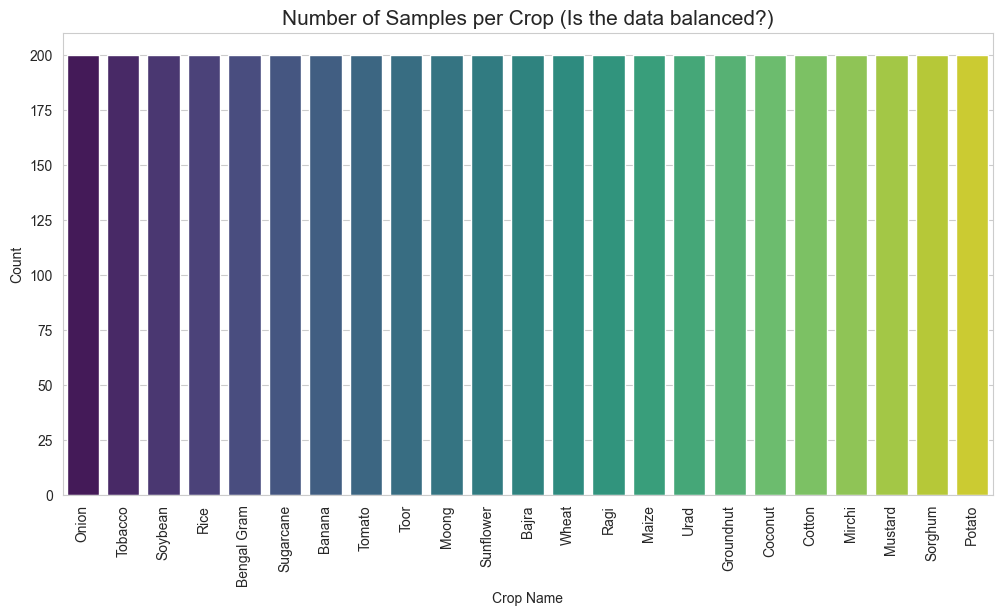

✅ Total Unique Crops: 23


In [4]:
# Cell 4: Crop Distribution Analysis

print("--- Count of Samples per Crop ---")
crop_counts = df['crop'].value_counts()
print(crop_counts)

# Visualize the Balance
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='crop', order=crop_counts.index, palette='viridis')
plt.xticks(rotation=90)  # Rotate names so they don't overlap
plt.title("Number of Samples per Crop (Is the data balanced?)", fontsize=15)
plt.xlabel("Crop Name")
plt.ylabel("Count")
plt.show()

print(f"✅ Total Unique Crops: {df['crop'].nunique()}")

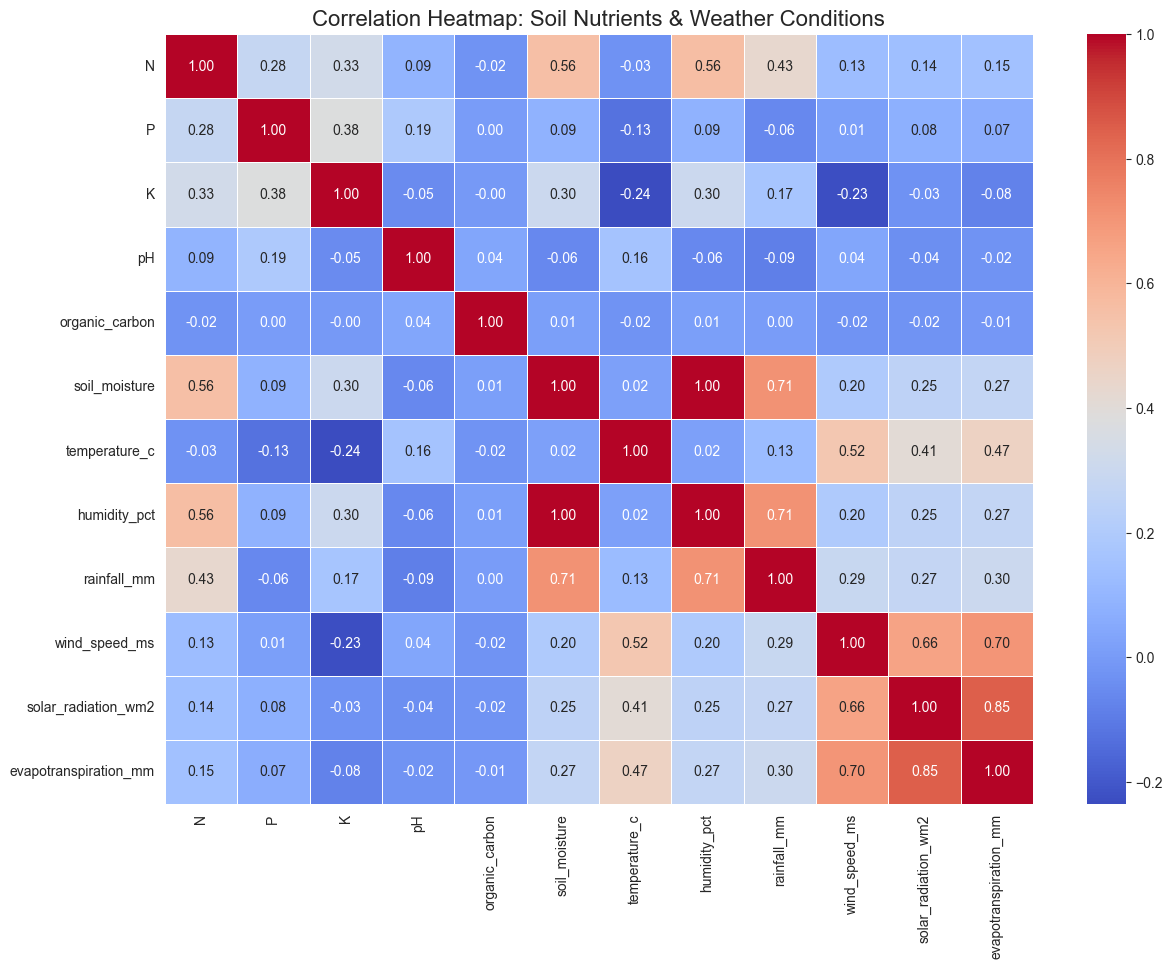


--- Nutrient Correlation Insight ---
Correlation between N and P: 0.2806989394925931
Correlation between N and K: 0.3268941752332848


In [6]:
# Cell 5: Feature Correlation Analysis

# 1. Automatically select ONLY numerical columns
# This ignores 'crop', 'State', 'District' etc. safely
numeric_df = df.select_dtypes(include='number')

# 2. Calculate Correlation Matrix
corr_matrix = numeric_df.corr()

# 3. Plot Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap: Soil Nutrients & Weather Conditions", fontsize=16)
plt.show()

# --- Extra: Quick Insight on Nutrients ---
print("\n--- Nutrient Correlation Insight ---")
# Check if 'N' exists before printing (just in case column names differ slightly)
if 'N' in corr_matrix.index and 'P' in corr_matrix.columns:
    print("Correlation between N and P:", corr_matrix.loc['N', 'P'])
if 'N' in corr_matrix.index and 'K' in corr_matrix.columns:
    print("Correlation between N and K:", corr_matrix.loc['N', 'K'])

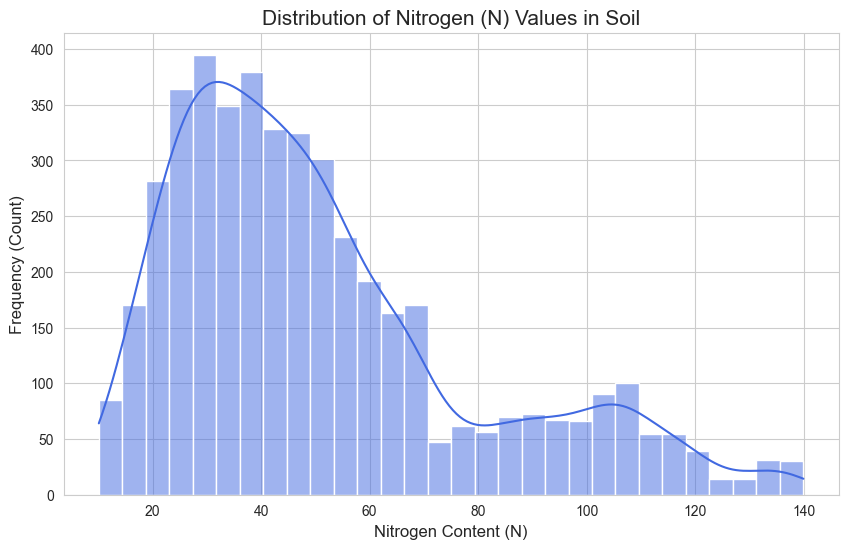

Average Nitrogen: 51.08
Min Nitrogen: 10.1
Max Nitrogen: 139.9


In [7]:
# Cell 6: Histogram of Nitrogen (N) Levels

plt.figure(figsize=(10, 6))

# Plot Histogram with a KDE (Kernel Density Estimate) line
sns.histplot(df['N'], kde=True, color='royalblue', bins=30)

plt.title('Distribution of Nitrogen (N) Values in Soil', fontsize=15)
plt.xlabel('Nitrogen Content (N)', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.show()

# Quick Stat
print(f"Average Nitrogen: {df['N'].mean():.2f}")
print(f"Min Nitrogen: {df['N'].min()}")
print(f"Max Nitrogen: {df['N'].max()}")

In [8]:
# Cell 7: Preprocessing & Train-Test Split

# 1. Define the Input Features (X)
# Make sure these match your CSV column names exactly
feature_columns = [
    'N', 'P', 'K', 'temperature_c', 'humidity_pct', 'pH', 'rainfall_mm',
    'organic_carbon', 'soil_moisture', 
    'wind_speed_ms', 'solar_radiation_wm2', 'evapotranspiration_mm'
]

X = df[feature_columns]
y = df['crop']

print(f"Features selected: {len(feature_columns)}")

# 2. Encode the Target Labels (Text -> Numbers)
# Example: Rice -> 20, Cotton -> 5
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Save the encoder! We need this for the App to translate numbers back to names.
joblib.dump(le, 'label_encoder.pkl')
print("✅ Label Encoder saved as 'label_encoder.pkl'")

# Show mapping example
print("\n--- Example Class Mappings ---")
for i, label in enumerate(le.classes_[:5]): # Show first 5
    print(f"Class {i}: {label}")

# 3. Split the Data
# 80% Training, 20% Testing
# stratify=y means: If Rice is 10% of total data, it will be 10% of train AND test.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\n✅ Data Split Completed:")
print(f"   Training Set: {X_train.shape[0]} rows")
print(f"   Testing Set:  {X_test.shape[0]} rows")

Features selected: 12
✅ Label Encoder saved as 'label_encoder.pkl'

--- Example Class Mappings ---
Class 0: Bajra
Class 1: Banana
Class 2: Bengal Gram
Class 3: Coconut
Class 4: Cotton

✅ Data Split Completed:
   Training Set: 3680 rows
   Testing Set:  920 rows


⏳ Training 9 models... This might take a minute.

   training Logistic Regression...


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   training Naive Bayes...
   training Support Vector Machine...
   training K-Nearest Neighbors...
   training Decision Tree...
   training Random Forest...
   training Bagging...
   training AdaBoost...
   training Gradient Boosting...

🏆 --- MODEL PERFORMANCE LEADERBOARD --- 🏆


,Model,Accuracy
6,Bagging,96.847826
5,Random Forest,96.630435
4,Decision Tree,95.543478
8,Gradient Boosting,95.543478
1,Naive Bayes,95.326087
0,Logistic Regression,92.391304
2,Support Vector Machine,91.521739
3,K-Nearest Neighbors,89.782609
7,AdaBoost,13.043478


C:\Users\HP\AppData\Local\Temp\ipykernel_3272\1670224376.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


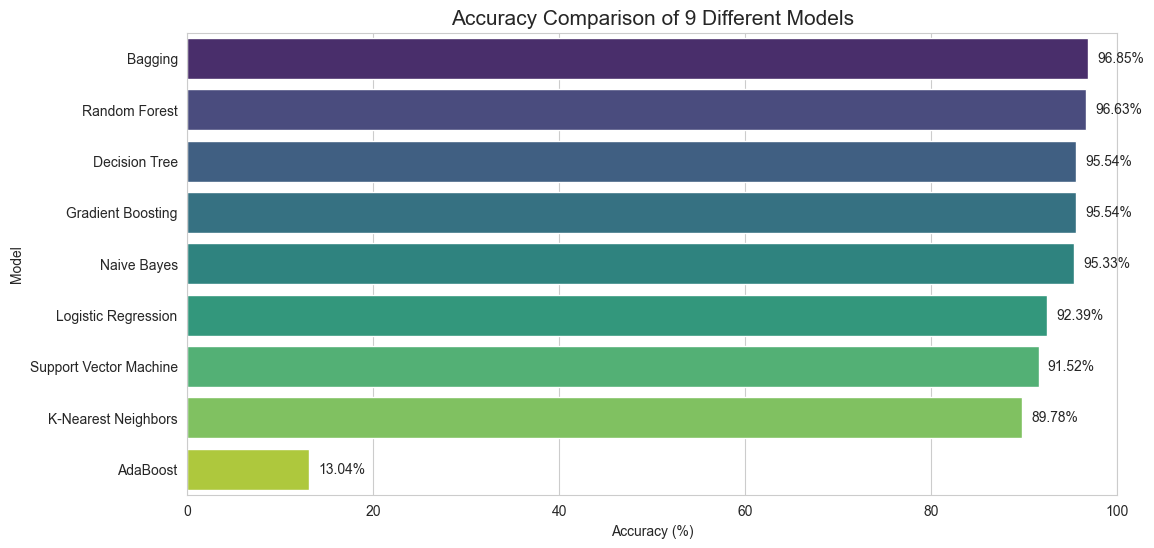

In [11]:
# Cell 8: The Model Showdown (Comparing 9 Algorithms)

# 1. Import all 9 Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# 2. Define the dictionary of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# 3. Train and Evaluate each model
results = []
print("⏳ Training 9 models... This might take a minute.\n")

for name, model in models.items():
    print(f"   training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc * 100})

# 4. Create a DataFrame to view results
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

print("\n🏆 --- MODEL PERFORMANCE LEADERBOARD --- 🏆")
display(results_df)

# 5. Visualize the Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Accuracy Comparison of 9 Different Models', fontsize=15)
plt.xlabel('Accuracy (%)')
plt.xlim(0, 100) # Scale from 0 to 100
for index, value in enumerate(results_df['Accuracy']):
    plt.text(value + 1, index, f"{value:.2f}%", va='center')
plt.show()



In [12]:
# Cell 9: Select and Save the Best Performing Model

# 1. Get the Winner's Name and Score from the top of the DataFrame
winner_name = results_df.iloc[0]['Model']
winner_score = results_df.iloc[0]['Accuracy']

print(f"🏆 AND THE WINNER IS: {winner_name}")
print(f"💎 Accuracy: {winner_score:.2f}%")

# 2. Get the actual trained model object from the dictionary
best_model = models[winner_name]

# 3. Save this specific model to the file
joblib.dump(best_model, 'crop_model_final.pkl')

print(f"\n💾 Saved {winner_name} as 'crop_model_final.pkl'")
print("🚀 Your App will now use this model for predictions!")

# 4. (Optional) Update the 'rf_model' variable so next cells use the winner
rf_model = best_model
print(f"✅ Variable 'rf_model' updated to hold {winner_name} for further testing.")

🏆 AND THE WINNER IS: Bagging
💎 Accuracy: 96.85%

💾 Saved Bagging as 'crop_model_final.pkl'
🚀 Your App will now use this model for predictions!
✅ Variable 'rf_model' updated to hold Bagging for further testing.
